# Example notebook: waveform plotting and annotation
This example notebook uses `participants.tsv` and `measurements_oscillometric.tsv` in the `samples` data directory, and the raw waveform data stored in the `measurements_oscillometric` subdirectory.

In [2]:
# Imports.
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal

In [3]:
# Location of 'sample' data directory.
DATA_DIR=os.path.join('..', 'sample')

In [4]:
# Additional constants/parameters.

# Define an offset into the collection of participants.
PID_INDEX = 3

# Define an offset into the collection of measurements.
MEAS_INDEX = 2

# Define the sampling rate for the waveform data (see README.pdf for detail).
FS = 500

In [5]:
# Load participants.tsv and measurements.tsv dataframes.
ppt_df = pd.read_csv(os.path.join(DATA_DIR, 'participants.tsv'), delimiter='\t')
meas_df = pd.read_csv(os.path.join(DATA_DIR, 'measurements_oscillometric.tsv'), delimiter='\t')

In [6]:
# Get a view of the participant's measurement metadata.
ppt_meas_df = meas_df.loc[meas_df.pid==ppt_df.pid[PID_INDEX]]

In [7]:
# Get metadata for a specific measurement.
meas_series = ppt_meas_df.iloc[MEAS_INDEX]
meas_series

pid                                                                 o003
phase                                                            initial
measurement                                               Sitting arm up
date_time                                            2018-01-01 09:34:48
sbp                                                                136.0
dbp                                                                 91.0
duration                                                            30.0
pressure_quality                                                   0.845
optical_quality                                                     0.88
waveform_file_path     measurements_oscillometric/o003/o003.initial.S...
waveforms_generated                                                    1
Name: 145, dtype: object

In [ ]:
# Load the raw waveform data for the measurement of interest.
waveform_df = pd.read_csv(os.path.join(DATA_DIR, meas_series.waveform_file_path), delimiter='\t')

In [8]:
# Define ad hoc bandpass filtering function.
def _bandpass_filter(data: np.ndarray, hp: float, lp: float, fs: float = FS) -> np.ndarray:
    order = 4
    b, a = signal.butter(order, (hp, lp), btype='bandpass', fs=fs)
    return signal.lfilter(b, a, data-data[0])

Text(0, 0.5, 'PPG (AU)')

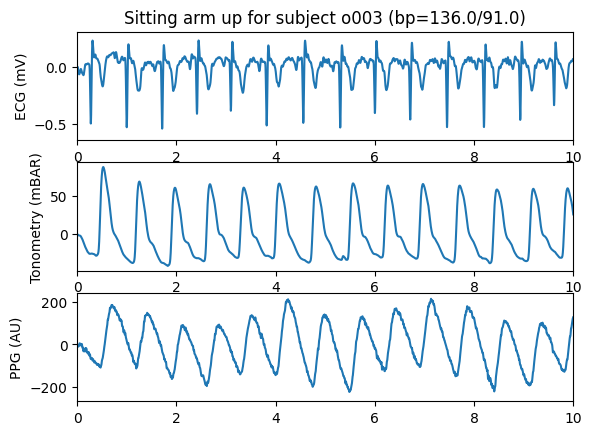

In [9]:
# Plot ECG, pressure, and optical waveforms. Note that ECG waveform will be inverted or not depending on
# electrode placement.
plt.subplot(3,1,1)
plt.plot(waveform_df.t, _bandpass_filter(waveform_df.ekg.to_numpy(), 0.5, 20))
plt.xlim(0,10)
plt.title(f'{meas_series.measurement} for subject {meas_series.pid} (bp={meas_series.sbp}/{meas_series.dbp})')
plt.ylabel('ECG (mV)')

plt.subplot(3,1,2)
plt.plot(waveform_df.t, _bandpass_filter(waveform_df.pressure.to_numpy(), 0.25, 50))
plt.xlim(0,10)
plt.ylabel('Tonometry (mBAR)')

plt.subplot(3,1,3)
plt.plot(waveform_df.t, _bandpass_filter(waveform_df.optical.to_numpy(), 0.25, 50))
plt.xlim(0,10)
plt.ylabel('PPG (AU)')    